In [7]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [8]:
eco = pd.read_csv("EcommerceCustomers.csv")

In [9]:
eco.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Show features of Dataset

In [4]:
eco.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,336.000000,336.000000,336.000000,336.000000,336.000000
mean,33.002723,12.108538,37.105369,3.553340,501.697863
std,0.980375,0.991746,1.002965,1.011396,80.164835
min,29.532429,8.508152,33.913847,0.789520,256.670582
25%,32.338172,11.424551,36.424924,2.956254,448.785076
50%,32.977611,12.039228,37.116471,3.581897,501.811832
75%,33.696273,12.879519,37.716432,4.126829,553.105643
max,36.139662,15.126994,40.005182,6.922689,765.518462


Compare yearly amount spent against different variables

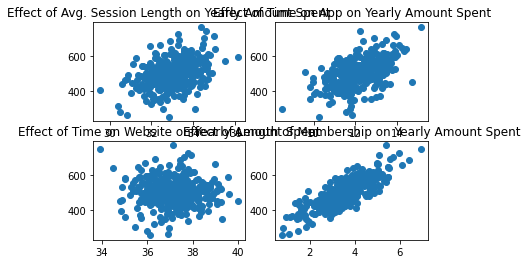

In [5]:
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title(f"Effect of {eco.columns[i+2]} on {eco.columns[-1]}")
    plt.scatter(eco.iloc[:, i+2], eco.iloc[:, -1])

Sample Correlation

In [6]:
eco.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,0.046848,-0.038107,0.073783,0.391496
Time on App,0.046848,1.000000,0.080085,0.025414,0.510212
Time on Website,-0.038107,0.080085,1.000000,-0.086503,-0.037837
Length of Membership,0.073783,0.025414,-0.086503,1.000000,0.805242
Yearly Amount Spent,0.391496,0.510212,-0.037837,0.805242,1.000000


It shows "Length of MemberShip" and "Time spent on app" has positive effect on yearly amount spent